In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data , columns = boston.feature_names)
df['Price'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X = df['LSTAT'].values
y = df['Price'].values

In [6]:
X = X[: , np.newaxis]
y = y[: , np.newaxis]

In [7]:
lr = LinearRegression()

In [8]:
quadritic = PolynomialFeatures(degree =2)

In [9]:
cubic = PolynomialFeatures(degree = 3)

In [21]:
X_quad = quadritic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [11]:
X_plot = np.arange(X.min() , X.max() , 0.5)[:,np.newaxis]

In [12]:
X_plot.shape

(73, 1)

In [13]:
lr = lr.fit(X,y)

In [14]:
lr_pred = lr.predict(X_plot)

In [15]:
linear_r2 = r2_score(y , lr.predict(X))
linear_r2

0.5441462975864799

In [16]:
pr_quad = lr.fit(X_quad , y)             #quadritic model

In [17]:
pr_quad_pred = pr_quad.predict(quadritic.fit_transform(X_plot))

In [18]:
quadritic_r2 = r2_score(y , pr_quad.predict(X_quad))

In [19]:
quadritic_r2

0.6407168971636611

In [22]:
pr_cubic = lr.fit(X_cubic , y)

In [23]:
pr_cubic_pred = pr_cubic.predict(cubic.fit_transform(X_plot))

In [25]:
cubic_r2 = r2_score(y , pr_cubic.predict(X_cubic))

In [26]:
cubic_r2

0.6578476405895719

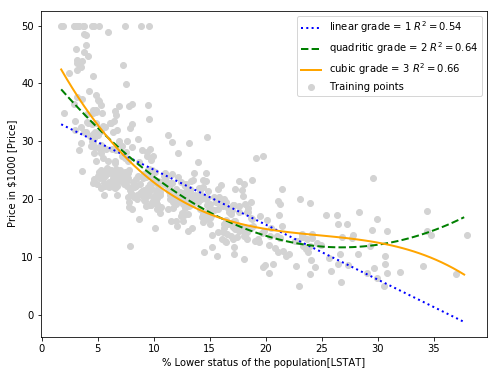

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(X, y , label = 'Training points' , color = 'lightgrey')
plt.plot(X_plot , lr_pred , label = 'linear grade = 1 $R^2 = %.2f$' % linear_r2, color = 'blue' ,lw=2 , linestyle = ':')

plt.plot(X_plot , pr_quad_pred , label = 'quadritic grade = 2 $R^2 = %.2f$' % quadritic_r2, color = 'green' ,lw=2 , linestyle = '--')

plt.plot(X_plot , pr_cubic_pred , label = 'cubic grade = 3 $R^2 = %.2f$' % cubic_r2, color = 'orange' ,lw=2 , linestyle = '-')
plt.xlabel('% Lower status of the population[LSTAT]')
plt.ylabel ('Price in $1000 [Price]')
plt.legend(loc = 'best')
plt.show()

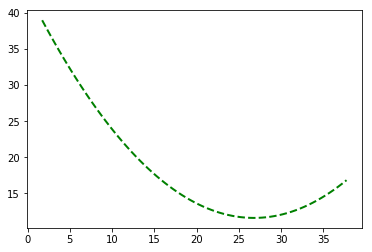

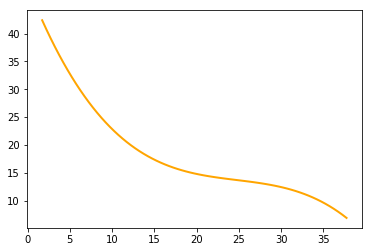